In [38]:
#23-24 june 2017 /2017/cm16772-2/ NeXus & .dat files
# sgome not in NeXus file - need to use .dat files

# cvscan tests 18dec2020 added

In [1]:
import sys
sys.path.append('/dls_sw/i16/software/python')
from dlstools import dataloader
from matplotlib.pyplot import *
#import matplotlib.pyplot as plt
path='/dls/i16/data/2017/cm16772-2/'
d=dataloader.dlsloader(path+'%i.dat')

#%matplotlib inline
%matplotlib notebook
#%matplotlib nbagg


=== Importing dlstools package


/dls_sw/apps/python/anaconda/4.6.14/64/envs/cctbx/lib/python2.7/site-packages/scisoftpy/_external/tifffile.py:8121: UserWarning: No module named _tifffile
  Functionality might be degraded or be slow.

  warnings.warn('%s%s' % (e, warn))


=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


In [2]:
d(641574)

#641574  sgome kphi kap kth kmu kdelta kgam delta_axis_offset TimeSec ic1monitor rc count_time path maxx maxy maxval sum metadata

<IPython.core.display.Javascript object>


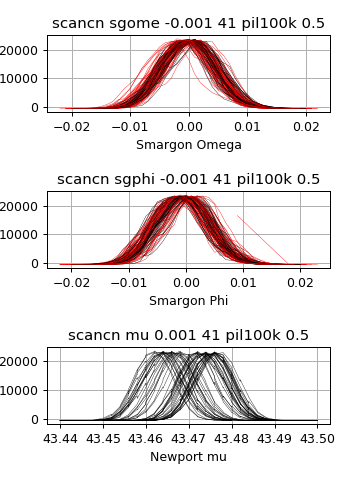

52
52
53


In [31]:
#zero at +ve peak centres

#for i in range(641587, 641610):
#    print(i, d(i).cmd)

%matplotlib notebook


figure()
subplot(3,1,1)
icount = 0
#for i in range(641587, 641630, 6): #mu scans
#for i in range(641589, 641800, 6): #sgome scans
for i in range(641588, 641900, 6): #sgome scans  (bidirectional)
    d(i)
    #print(d)
    meanval = np.mean(d.sgome)
    plot(d.sgome - meanval, d.sum, 'k', linewidth=.3)
    d(i+1)
    #print(d)
    plot(d.sgome - meanval, d.sum, 'r', linewidth=.3)  
    icount += 1
xlabel('Smargon Omega')
ylabel('Counts'); title(d.cmd); grid(1)
print(icount)


#figure()
subplot(3,1,2)
icount = 0
for i in range(641590, 641900, 6): #sgphi scans (bidirectional)
    d(i)
    #print(d.cmd)
    #print(d)
    meanval = np.mean(d.sgphi)
    plot(d.sgphi - meanval, d.sum, 'k', linewidth=.3)
    d(i+1)
    #print(d.cmd)
    #print(d)
    plot(d.sgphi - meanval, d.sum, 'r', linewidth=.3)  
    icount += 1
xlabel('Smargon Phi')
ylabel('Counts'); title(d.cmd); grid(1)
print(icount)


#figure()
subplot(3,1,3)
icount = 0
for i in range(641587, 641900, 6): #sgome scans  (bidirectional)
    d(i)
    #print(d)
    #meanval = np.mean(d.sgome)
    plot(d.mu, d.sum, 'k', linewidth=.3)
    icount += 1
xlabel('Newport mu')
ylabel('Counts'); title(d.cmd); grid(1)
print(icount)

tight_layout()
#gcf().subplots_adjust(left=.5)

In [32]:
savefig('ome_phi_mu_step.png', bbox_inches="tight")


In [4]:
#after plotting
#stretch
#gcf().tight_layout()
#savefig('/home/spc93/tmp/smargon1.pdf')

In [5]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

from dlstools.quickfit import *
import matplotlib.pyplot as plt

from IPython.core.display import HTML
pd.set_option('display.max_rows',8)

#%matplotlib inline
%matplotlib notebook
#%matplotlib nbagg

p='/dls/i16/data/2020/mm25392-2/%i.nxs'

In [6]:
#scans with sgomeZebra etc are cvscans
#all test scans are here
#looks like they worked but with no hdf5 file writing
for scan in range(873167,873184):
    try:
        n = pdnx(p % scan)
        print '#', scan
        print(n.nx.entry1.scan_command)
        #display(HTML(n.to_html()))
        print(n)

    except:
        pass

=== Error loading file /dls/i16/data/2020/mm25392-2/873167.nxs
# 873167
=== Error loading file /dls/i16/data/2020/mm25392-2/873168.nxs
# 873168
=== Error loading file /dls/i16/data/2020/mm25392-2/873169.nxs
# 873169
=== Error loading file /dls/i16/data/2020/mm25392-2/873170.nxs
# 873170
# 873171
scan sgomegaZebra 0 10 0.01 smargonZebraPil3 0.1
   count_time  sgomegaZebra  filepath
0       0.097           0.0       0.0
1       0.097           0.0       0.0
2       0.097           0.0       0.0
3       0.097           0.0       0.0
4       0.097           0.0       0.0
5       0.097           0.0       0.0
=== Error loading file /dls/i16/data/2020/mm25392-2/873172.nxs
# 873172
=== Error loading file /dls/i16/data/2020/mm25392-2/873173.nxs
# 873173
=== Error loading file /dls/i16/data/2020/mm25392-2/873174.nxs
# 873174
=== Error loading file /dls/i16/data/2020/mm25392-2/873175.nxs
# 873175
# 873176
scan kphiZebra 56.045 58.045 0.01 kphiZebraPil3 0.1
     count_time  filepath  kphiZebra
0 

# Smargon tests 26/4/21

In [7]:
from numpy import arange, array, linspace
def deviation(xvec):
    x = list(xvec)
    start, end, rng = x[0], x[-1], x[-1]-x[0]
    #inc = 1.0*rng/(len(x)-1)
    linvals = linspace(x[0], x[-1], len(x))
    return array(x - linvals)

xx = [11,9,6,2]
deviation(xx)

array([0., 1., 1., 0.])

In [8]:
from numpy import arange

import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

from dlstools.quickfit import *
import matplotlib.pyplot as plt

from IPython.core.display import HTML
pd.set_option('display.max_rows',8)

#%matplotlib inline
%matplotlib notebook
#%matplotlib nbagg

p='/dls/i16/data/2021/cm28156-2/%i.nxs'

<IPython.core.display.Javascript object>


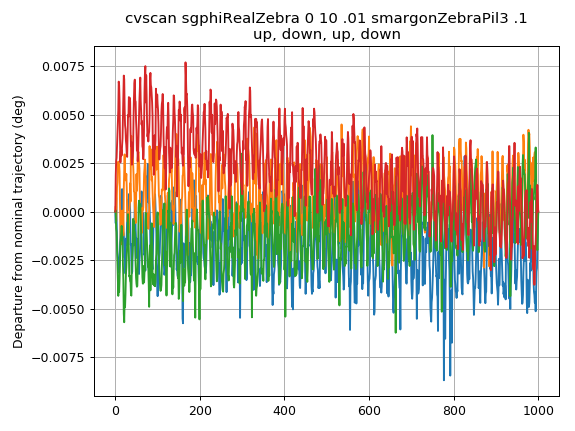

In [36]:
%matplotlib notebook
txt = 'cvscan sgphiRealZebra 0 10 .01 smargonZebraPil3 .1\nup, down, up, down'
scans = range(883071, 883074+1)
figure()
for scan in scans:
    n = pdnx(p % scan)
    key = n.keys()[2]
    n['dev'] = deviation(n[key])
    plot(n.dev)
grid(1); title(txt); ylabel('Departure from nominal trajectory (deg)')
tight_layout()
    

In [37]:
savefig('cvscan_sgphi_10deg.png', bbox_inches="tight")

Text(0.5,1,'cvscan sgphiRealZebra 0 1 .001 smargonZebraPil3 .1\nup, down, up, down')

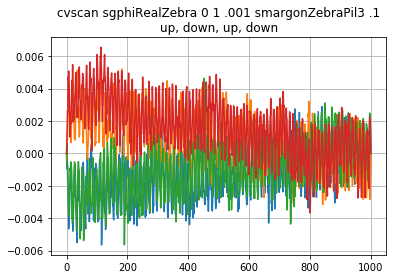

In [58]:
txt = 'cvscan sgphiRealZebra 0 1 .001 smargonZebraPil3 .1\nup, down, up, down'
scans = range(883075, 883078+1)
figure()
for scan in scans:
    n = pdnx(p % scan)
    key = n.keys()[2]
    n['dev'] = deviation(n[key])
    plot(n.dev)
grid(1); title(txt)
    

<IPython.core.display.Javascript object>


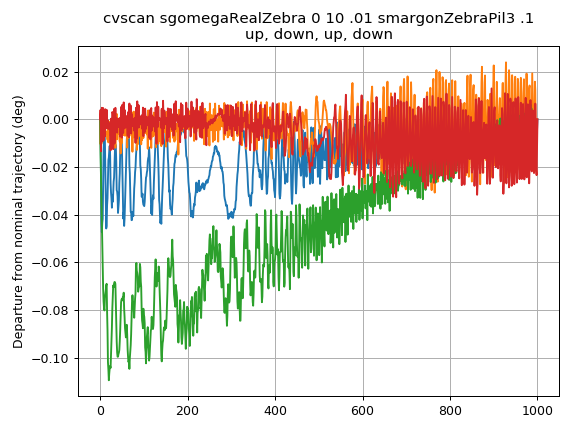

In [38]:
%matplotlib notebook
txt = 'cvscan sgomegaRealZebra 0 10 .01 smargonZebraPil3 .1\nup, down, up, down'
scans = [883079, 883082, 883083, 883084]
figure()
for scan in scans:
    n = pdnx(p % scan)
    key = n.keys()[2]
    n['dev'] = deviation(n[key])
    plot(n.dev)
grid(1); title(txt); ylabel('Departure from nominal trajectory (deg)')
tight_layout()
    

In [39]:
savefig('cvscan_sgome_10deg.png', bbox_inches="tight")

<IPython.core.display.Javascript object>


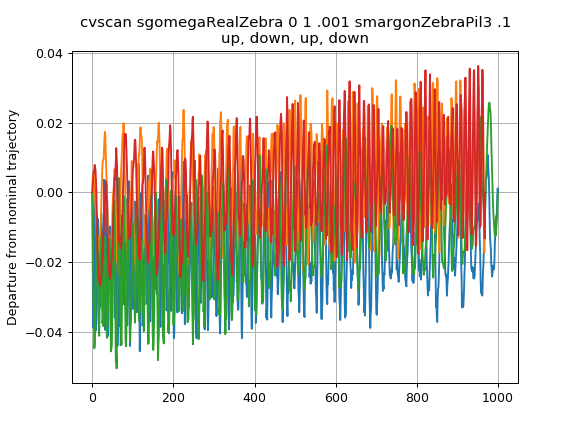

Text(0,0.5,'Departure from nominal trajectory')

In [21]:
txt = 'cvscan sgomegaRealZebra 0 1 .001 smargonZebraPil3 .1\nup, down, up, down'
scans = range(883067, 883070+1)
figure()
for scan in scans:
    n = pdnx(p % scan)
    key = n.keys()[2]
    n['dev'] = deviation(n[key])
    plot(n.dev)
grid(1); title(txt); ylabel('Departure from nominal trajectory (deg)')
    